In [1]:
print("Lord_Balaji")

Lord_Balaji


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("E:\Python_Vedeo\DataSets\Salary_Satisfaction\salary_satisfaction.csv")

In [4]:
df.head()

,Service,Salary
0,excellent,low
1,excellent,low
2,excellent,low
3,excellent,low
4,excellent,low


In [6]:
df.shape

(100, 2)

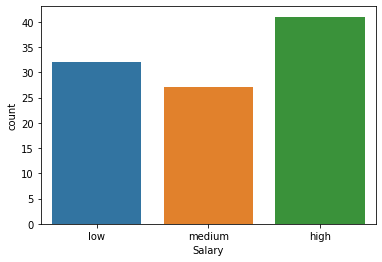

In [7]:
sns.countplot(df.Salary)

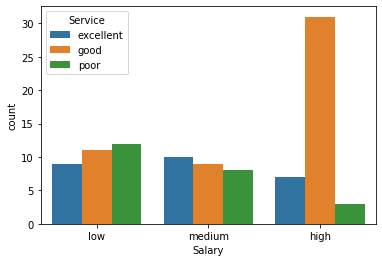

In [9]:
sns.countplot(df.Salary, hue =df['Service'])

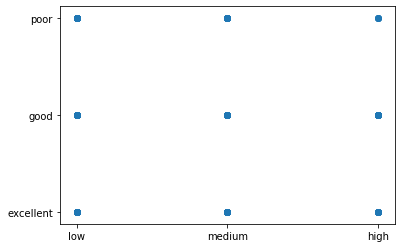

In [10]:
plt.scatter(df.Salary, df.Service)

In [11]:
df.isnull().sum()

Service    0
Salary     0
dtype: int64

In [18]:
df['Salary'] = df['Salary'].replace({'low':0, 'medium':1,'high':2})

In [19]:
df.head()

,Service,Salary
0,excellent,0
1,excellent,0
2,excellent,0
3,excellent,0
4,excellent,0


In [20]:
df.Salary.unique()

array([0, 1, 2], dtype=int64)

In [21]:
dummmy = pd.get_dummies(df.Service, prefix = 'Service', drop_first =True)

In [24]:
dummmy

,Service_good,Service_poor
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,1
97,0,1
98,0,1


In [25]:
df2 = pd.concat([df,dummmy], axis =1)

In [26]:
df2.head()

,Service,Salary,Service_good,Service_poor
0,excellent,0,0,0
1,excellent,0,0,0
2,excellent,0,0,0
3,excellent,0,0,0
4,excellent,0,0,0


In [33]:
X = df2.iloc[:,[2,3]]

In [34]:
X

,Service_good,Service_poor
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,1
97,0,1
98,0,1


In [35]:
y = df2.iloc[:,1]

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 2), (25, 2), (75,), (25,))

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
KNN_Model = KNeighborsClassifier(n_neighbors=1)

In [53]:
KNN_Model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
KNN_Model.score(X_test, y_test)

0.4

In [55]:
KNN_Prediction = KNN_Model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score_KNN = accuracy_score(y_test, KNN_Prediction)*100

In [59]:
accuracy_score_KNN

40.0